In [1]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

conn = sqlite3.connect("GameSales.sqlite")
cursor = conn.cursor()

cursor.execute('''CREATE TABLE IF NOT EXISTS GameSales (
                  id INTEGER PRIMARY KEY AUTOINCREMENT,
                  Name TEXT,
                  Platform TEXT,
                  Year INTEGER,
                  Genre TEXT,
                  Publisher TEXT,
                  Global_Sales FLOAT
)''')
conn.commit()

In [2]:
game_list = [
    ('Wii Sports', 'Wii', 2006, 'Sports', 'Nintendo', 82.74),
    ('Super Mario Bros.', 'NES', 1985, 'Platform', 'Nintendo', 40.24),
    ('Mario Kart Wii', 'Wii', 2008, 'Racing', 'Nintendo', 35.82),
    ('Red Dead Redemption 2', 'PS4', 2018, 'Action', 'Rockstar Games', 23.0),
    ('Minecraft', 'Multi-platform', 2011, 'Sandbox', 'Mojang', 200.0)
]

new_game = ('The Legend of Zelda', 'Switch', 2017, 'Adventure', 'Nintendo', 23.5)

cursor.executemany("INSERT INTO GameSales (Name, Platform, Year, Genre, Publisher, Global_Sales) VALUES (?, ?, ?, ?, ?, ?)", game_list)
cursor.execute("INSERT INTO GameSales (Name, Platform, Year, Genre, Publisher, Global_Sales) VALUES (?, ?, ?, ?, ?, ?)", new_game)
conn.commit()

In [3]:
sel_result = cursor.execute("SELECT Name, Global_Sales FROM GameSales WHERE Global_Sales > 20")

print("გლობალური გაყიდვები 20 მილიონზე მეტი:\n")
for game in sel_result:
    print(game)


გლობალური გაყიდვები 20 მილიონზე მეტი:

('Wii Sports', 82.74)
('Super Mario Bros.', 40.24)
('Mario Kart Wii', 35.82)
('Wii Sports Resort', 33)
('Pokemon Red/Pokemon Blue', 31.37)
('Tetris', 30.26)
('New Super Mario Bros.', 30.01)
('Wii Play', 29.02)
('New Super Mario Bros. Wii', 28.62)
('Duck Hunt', 28.31)
('Nintendogs', 24.76)
('Mario Kart DS', 23.42)
('Pokemon Gold/Pokemon Silver', 23.1)
('Wii Fit', 22.72)
('Wii Fit Plus', 22)
('Kinect Adventures!', 21.82)
('Grand Theft Auto V', 21.4)
('Grand Theft Auto: San Andreas', 20.81)
('Super Mario World', 20.61)
('Brain Age: Train Your Brain in Minutes a Day', 20.22)
('Wii Sports', 82.74)
('Super Mario Bros.', 40.24)
('Mario Kart Wii', 35.82)
('Red Dead Redemption 2', 23)
('Minecraft', 200)
('The Legend of Zelda', 23.5)
('Wii Sports', 82.74)
('Super Mario Bros.', 40.24)
('Mario Kart Wii', 35.82)
('Red Dead Redemption 2', 23)
('Minecraft', 200)
('The Legend of Zelda', 23.5)
('Wii Sports', 82.74)
('Super Mario Bros.', 40.24)
('Mario Kart Wii', 3

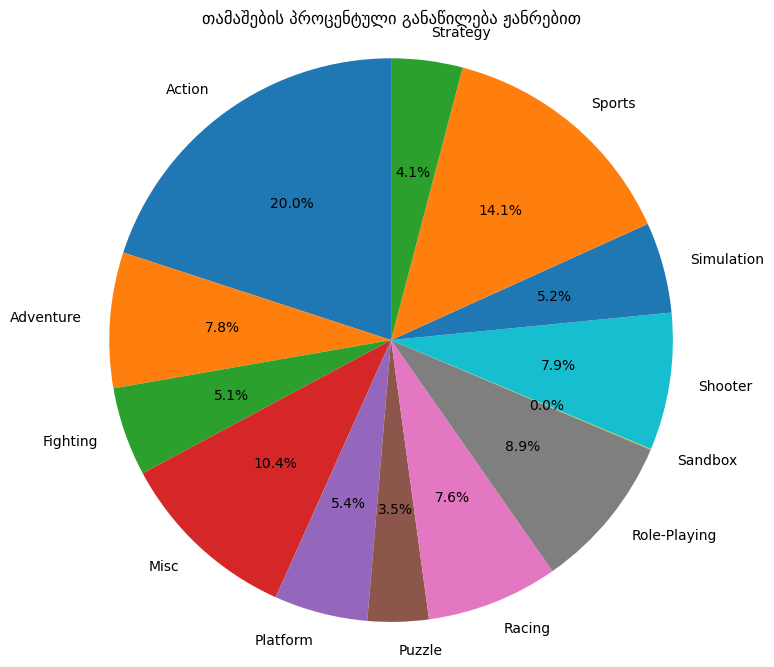

In [4]:
cursor.execute("SELECT Genre, COUNT(*) FROM GameSales GROUP BY Genre")
genre_data = cursor.fetchall()

genres = [row[0] for row in genre_data]
genre_counts = [row[1] for row in genre_data]

plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genres, autopct='%1.1f%%', startangle=90)
plt.title("თამაშების პროცენტული განაწილება ჟანრებით")
plt.axis('equal')
plt.show()

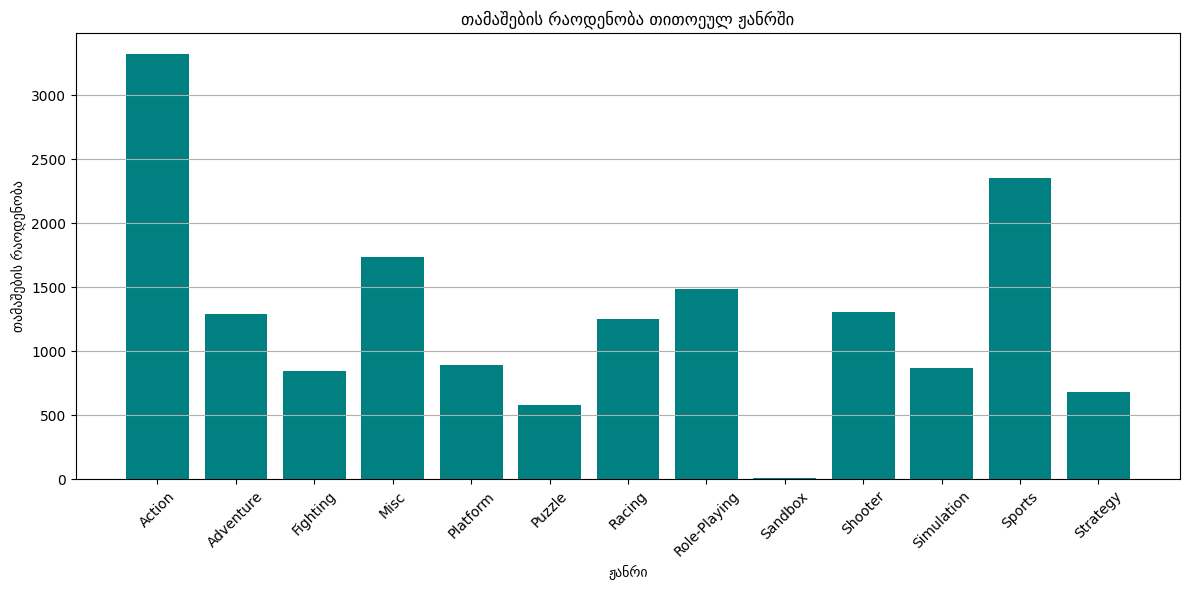

In [5]:
plt.figure(figsize=(12, 6))
plt.bar(genres, genre_counts, color='teal')
plt.xlabel("ჟანრი")
plt.ylabel("თამაშების რაოდენობა")
plt.title("თამაშების რაოდენობა თითოეულ ჟანრში")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

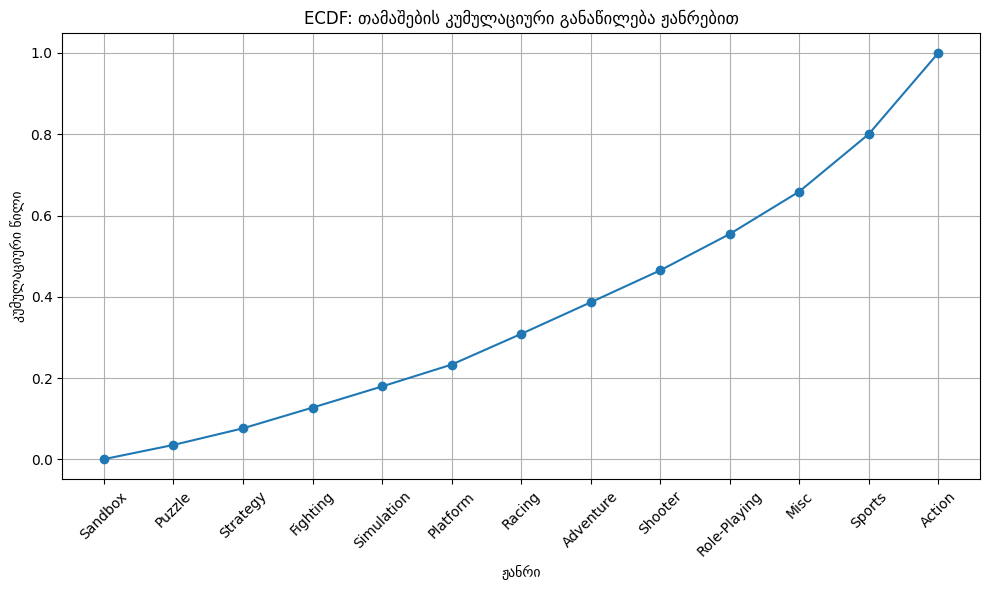

In [6]:
cursor.execute("SELECT Genre, COUNT(*) FROM GameSales GROUP BY Genre ORDER BY COUNT(*) ASC")
data = cursor.fetchall()

genres = [row[0] for row in data]
counts = [row[1] for row in data]

cum_counts = np.cumsum(counts)
total = cum_counts[-1]
y = cum_counts / total

plt.figure(figsize=(10, 6))
plt.plot(genres, y, marker='o', linestyle='-')
plt.xlabel("ჟანრი")
plt.ylabel("კუმულაციური წილი")
plt.title("ECDF: თამაშების კუმულაციური განაწილება ჟანრებით")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
conn.close()